## Application of Sentiment Analysis in analyzing tourists' opinions on Hospitality Services.

### Text Mining and Sentiment Analysis

In [1]:
# Import libraries to be used for this analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re # This module helps to work with Regular expressions
import seaborn as sns
from wordcloud import WordCloud
import nltk # This module helps to build Python programs to work with human language data.
nltk.download(
    [
      'stopwords', # Download Stopwords
      'punkt', # For tokenization
      'wordnet', # Download Lemmatizers
      'omw-1.4', # 
      'vader_lexicon' # Text sentiment analysis modules
    ]
)

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Import csv file and load courist ccomodation reviews dataset

hotel_reviews = pd.read_csv("tourist_accommodation_reviews.csv", encoding='cp1252')
hotel_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [3]:
# Inspecting all locations and number of Hotels/restaurants in eacht

hotel_reviews['Location'].value_counts()

 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Location, dtype: int64

In [4]:
# Filter on all reviews on hotels/restaurants in  Cheong Thale. The research focus will be on Cheong Thale

choeng_reviews = hotel_reviews[hotel_reviews['Location'] == ' Choeng Thale']
choeng_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
300,rn580036469,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,The view and Thai food served at Dee Plee are ...
301,rn580019506,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,We celebrated our honeymoon at Anantara and tr...
302,rn577321057,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Great Thai Food with and amazing View and Frie...
303,rn577073620,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Was occasionally in this place! Despite it was...
304,rn576749505,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Dee Plee is the Signature Thai restaurant of t...


In [5]:
#Check for empty cells
choeng_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 300 to 50216
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     3378 non-null   object
 1   Review Date            3378 non-null   object
 2   Location               3378 non-null   object
 3   Hotel/Restaurant name  3378 non-null   object
 4   Review                 3378 non-null   object
dtypes: object(5)
memory usage: 158.3+ KB


In [6]:
# Check for number of hotels in Choeng Thale Region.
# There is an imbalance in cont of reviews ( IDs) and unique number of reviews, this suggests duplication of reviews and IDs
choeng_reviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3378,3378,3378,3378,3378
unique,3218,1022,1,34,3218
top,rn563358651,Reviewed 1 week ago,Choeng Thale,Audy Restaurant,Lots of guests staying at the same hotel recom...
freq,6,44,3378,100,6


In [7]:
# Check for duplicates of IDs and Reviews
choeng_reviews[choeng_reviews.duplicated(['Review'], keep='first')]


,ID,Review Date,Location,Hotel/Restaurant name,Review
383,rn580036469,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,The view and Thai food served at Dee Plee are ...
384,rn580019506,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,We celebrated our honeymoon at Anantara and tr...
385,rn577321057,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Great Thai Food with and amazing View and Frie...
386,rn577073620,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Was occasionally in this place! Despite it was...
387,rn576749505,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Dee Plee is the Signature Thai restaurant of t...
...,...,...,...,...,...
47453,rn548208417,"Reviewed December 20, 2017",Choeng Thale,Kata Country House Restaurant,Amazing pizza ! Cheap place <f0><U+009F><U+009...
47454,rn542973679,"Reviewed November 24, 2017",Choeng Thale,Kata Country House Restaurant,Stop in after another restaurant said there in...
47455,rn539674507,"Reviewed November 9, 2017",Choeng Thale,Kata Country House Restaurant,We gave this place another try after a disappo...
47456,rn539547108,"Reviewed November 8, 2017",Choeng Thale,Kata Country House Restaurant,Nice and fresh food place to eat at anytime. C...


In [8]:
# Remove duplicated reviews and IDs and keep the first
choeng_reviews_drop = choeng_reviews.drop_duplicates(subset=['Review'])


In [9]:
#Confirm all duplicated Reviews and IDs have been removed 

choeng_reviews_drop.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3218,3218,3218,3218,3218
unique,3218,1022,1,34,3218
top,rn580036469,Reviewed 4 weeks ago,Choeng Thale,Audy Restaurant,The view and Thai food served at Dee Plee are ...
freq,1,37,3218,100,1


In [10]:
# Import the pre-trained VADER (Valence Aware Dictionary for Sentiment Reasoning) model from nltk, to estimate both sentiment polarity and intensity

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [11]:
# Apply the VADEER Model and Extract the polarity scores for all the reviews on hotels/restaurants in Choeng Thale

choeng_reviews_drop['neg'] = [sentiment.polarity_scores(review)['neg'] for review in choeng_reviews_drop['Review']]
choeng_reviews_drop['neu'] = [sentiment.polarity_scores(review)['neu'] for review in choeng_reviews_drop['Review']]
choeng_reviews_drop['pos'] = [sentiment.polarity_scores(review)['pos'] for review in choeng_reviews_drop['Review']]
choeng_reviews_drop['compound'] = [sentiment.polarity_scores(review)['compound'] for review in choeng_reviews_drop['Review']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [12]:
choeng_reviews_drop.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,neg,neu,pos,compound
300,rn580036469,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,The view and Thai food served at Dee Plee are ...,0.0,0.718,0.282,0.9359
301,rn580019506,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,We celebrated our honeymoon at Anantara and tr...,0.0,0.787,0.213,0.8777
302,rn577321057,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Great Thai Food with and amazing View and Frie...,0.0,0.471,0.529,0.9391
303,rn577073620,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Was occasionally in this place! Despite it was...,0.0,0.670,0.330,0.9598
304,rn576749505,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Dee Plee is the Signature Thai restaurant of t...,0.0,0.642,0.358,0.9618


In [13]:
choeng_reviews_drop[['pos', 'neg', 'neu', 'compound']].describe()

,pos,neg,neu,compound
count,3218.000000,3218.000000,3218.000000,3218.000000
mean,0.249933,0.022452,0.727612,0.715408
std,0.133087,0.045222,0.126244,0.370862
min,0.000000,0.000000,0.320000,-0.959400
25%,0.150000,0.000000,0.638000,0.665600
50%,0.245000,0.000000,0.733000,0.871200
75%,0.344000,0.037000,0.816000,0.937100
max,0.680000,0.407000,1.000000,0.989700


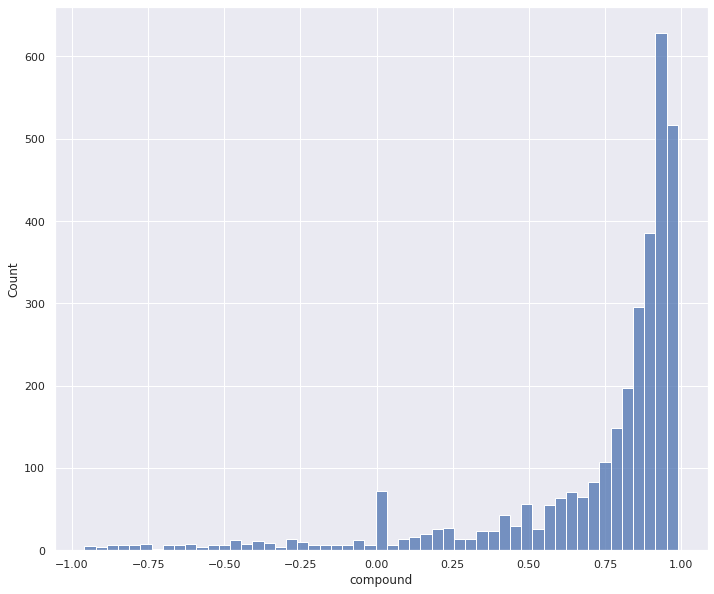

In [35]:
# Visualizing the compound ratings for all hotel/restaurants

sns.histplot(choeng_reviews_drop['compound'])

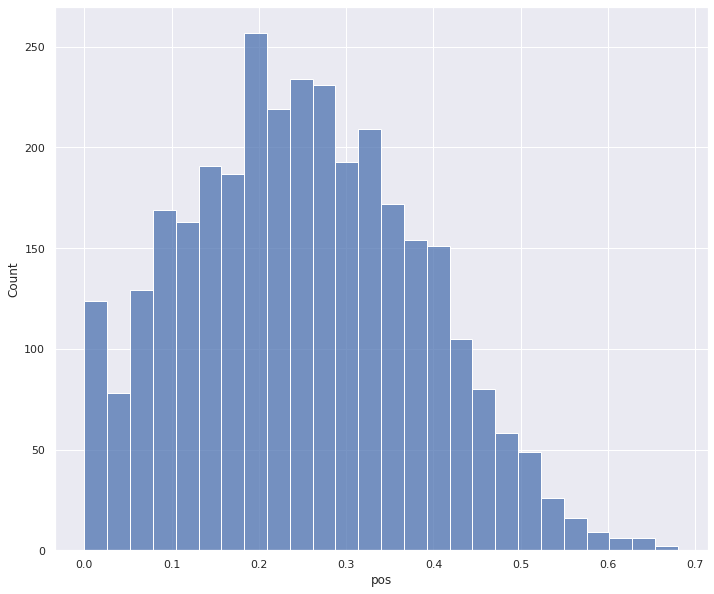

In [34]:
# Histogram displaying count of positive ratings for all hotel/restaurants
sns.histplot(choeng_reviews_drop['pos'])

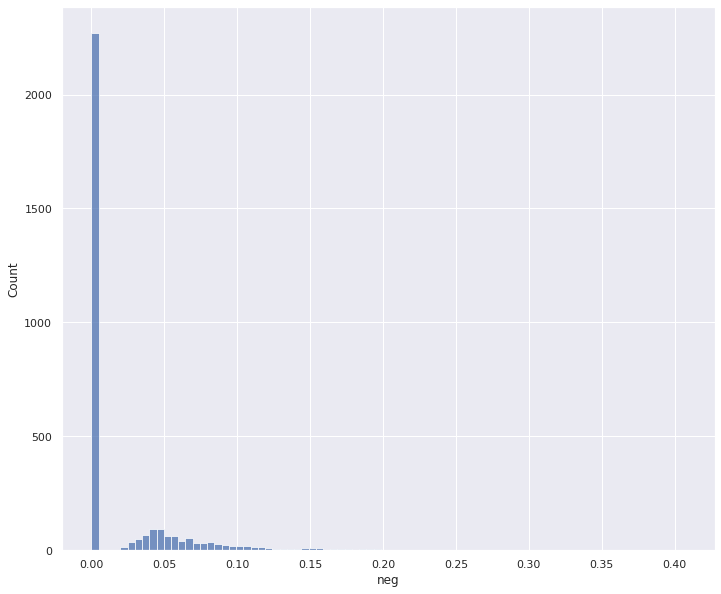

In [33]:
# Histogram displaying count of negative ratings for all hotel/restaurants
sns.histplot(choeng_reviews_drop['neg'])

In [21]:
# Dsiplay total number of negative reviews on each hostel/restaurant

(choeng_reviews_drop['compound']<=0).groupby(choeng_reviews_drop['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
360 ° Bar                                   5
9' Sea Breeze                              11
Ann's Kitchen Bar and Grill                 5
Audy Restaurant                             5
Bampot Kitchen & Bar                        3
Benny's American Bar & Grill                5
Black Cat                                  10
Bocconcino                                  7
Bodega & Grill                              9
Cafe de Bangtao                             8
Chilli Kitchen                              7
Cut Grill & Lounge                         11
D Restaurant                               11
DaVinci Restaurant                          5
DeDos                                       4
Dee Plee - Anantara Layan Phuket Resort     2
Don Vito Trattoria                          8
Flame                                      13
Golden Paradise Restaurant                  4
KEE Sky Lounge & Restaurant                 6
Kata Country House Restaurant              17
Little Paris

In [22]:
# Displaying percentage of negative reviews in total number of reviews received on each hotel/restaurant

negative_reviews = pd.DataFrame(
  round((choeng_reviews_drop['compound']<=0).groupby(choeng_reviews_drop['Hotel/Restaurant name']).sum() / 
  choeng_reviews_drop['Hotel/Restaurant name'].groupby(choeng_reviews_drop['Hotel/Restaurant name']).count()*100, 2),
  columns = ['Percentage of Negative Reviews (%)']
).sort_values(by='Percentage of Negative Reviews (%)')

negative_reviews

,Percentage of Negative Reviews (%)
Hotel/Restaurant name,
Dee Plee - Anantara Layan Phuket Resort,2.41
Bampot Kitchen & Bar,3.00
Golden Paradise Restaurant,4.00
DeDos,4.00
Red Tuna Restaurant Phuket,4.00
The Beach Cuisine,4.00
Siam Supper Club,4.00
DaVinci Restaurant,5.00
360 ° Bar,5.00


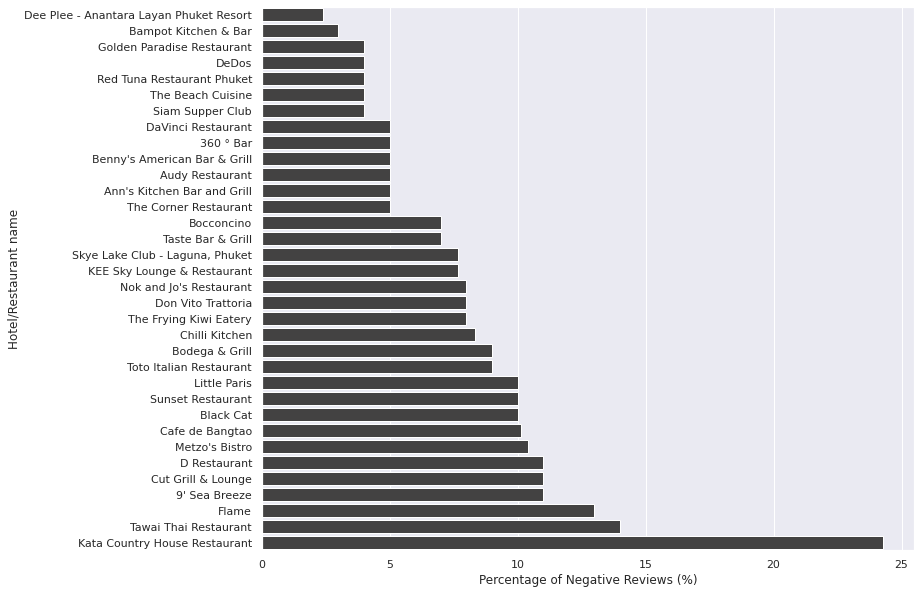

In [23]:
# Visualize percentage of negative reviews across all hotels

sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(data=negative_reviews, x='Percentage of Negative Reviews (%)', y=negative_reviews.index, color ='#434242')

In [24]:
# Process reviews for visualization by tokenizing, removing stop words and stemming words.

stop_words = nltk.corpus.stopwords.words('english')

def preprocess_text(param):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(param)
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [26]:
# Insert tokenized stings in a new column

choeng_reviews_drop['processed_reviews'] = choeng_reviews_drop['Review'].apply(preprocess_text)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# Preview newly inserted 'processed review' column
choeng_reviews_drop.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,neg,neu,pos,compound,processed_reviews
300,rn580036469,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,The view and Thai food served at Dee Plee are ...,0.0,0.718,0.282,0.9359,"[view, thai, food, serv, dee, plee, outstand, ..."
301,rn580019506,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,We celebrated our honeymoon at Anantara and tr...,0.0,0.787,0.213,0.8777,"[celebr, honeymoon, anantara, tri, dee, plee, ..."
302,rn577321057,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Great Thai Food with and amazing View and Frie...,0.0,0.471,0.529,0.9391,"[great, thai, food, amaz, view, friendli, serv..."
303,rn577073620,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Was occasionally in this place! Despite it was...,0.0,0.670,0.330,0.9598,"[occasion, place, despit, full, offer, sit, ou..."
304,rn576749505,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Dee Plee is the Signature Thai restaurant of t...,0.0,0.642,0.358,0.9618,"[dee, plee, signatur, thai, restaur, hotel, po..."


In [28]:
# Delving deeper into reasons for the number of negative reviews received by Kata Country Restaurant

subset_of_negative_reviews = choeng_reviews_drop[choeng_reviews_drop['Hotel/Restaurant name'] == 'Kata Country House Restaurant'] 
subset_of_negative_reviews = subset_of_negative_reviews[subset_of_negative_reviews['compound']<=0]

In [29]:
subset_of_negative_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,neg,neu,pos,compound,processed_reviews
47361,rn555502932,"Reviewed January 22, 2018",Choeng Thale,Kata Country House Restaurant,We arrived at Kata after a long taxi ride in r...,0.000,1.000,0.000,0.0000,"[arriv, kata, long, taxi, ride, rush, hour, tr..."
47362,rn551522012,"Reviewed January 4, 2018",Choeng Thale,Kata Country House Restaurant,Poor review due to me and my wife eating with ...,0.074,0.926,0.000,-0.4767,"[poor, review, due, wife, eat, fifteen, minut,..."
47365,rn539674507,"Reviewed November 9, 2017",Choeng Thale,Kata Country House Restaurant,We gave this place another try after a disappo...,0.232,0.686,0.082,-0.6901,"[gave, place, anoth, tri, disappoint, visit, p..."
47370,rn532476965,"Reviewed October 12, 2017",Choeng Thale,Kata Country House Restaurant,I don't like the food. The pancake tastes very...,0.309,0.590,0.101,-0.7187,"[like, food, pancak, tast, bad, rice, chicken,..."
47374,rn486347172,"Reviewed May 22, 2017",Choeng Thale,Kata Country House Restaurant,We went there for lunch yesterday and thoight ...,0.147,0.853,0.000,-0.5849,"[went, lunch, yesterday, thoight, food, realli..."


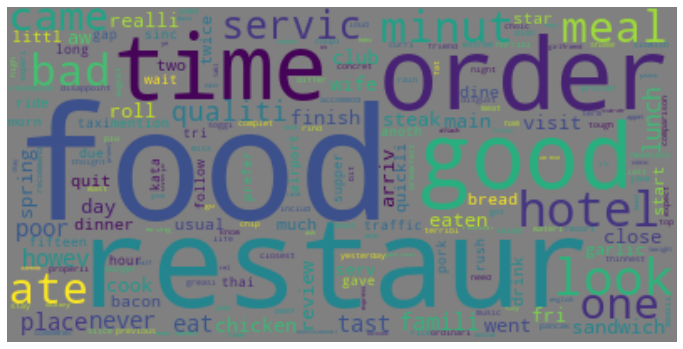

In [30]:
# Visualizing most frequent words in the negative reviews received by Kata country restaurant

neg_tokens = [word for review in subset_of_negative_reviews['processed_reviews'] for word in review]

wordcloud = WordCloud(background_color = 'grey', ).generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
# Extract the frequency distribution of all the tokens in the negative reviews

from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

   food restaur   order    time    good    look   hotel   minut    meal     bad 
     10       9       6       5       5       4       4       4       4       4 


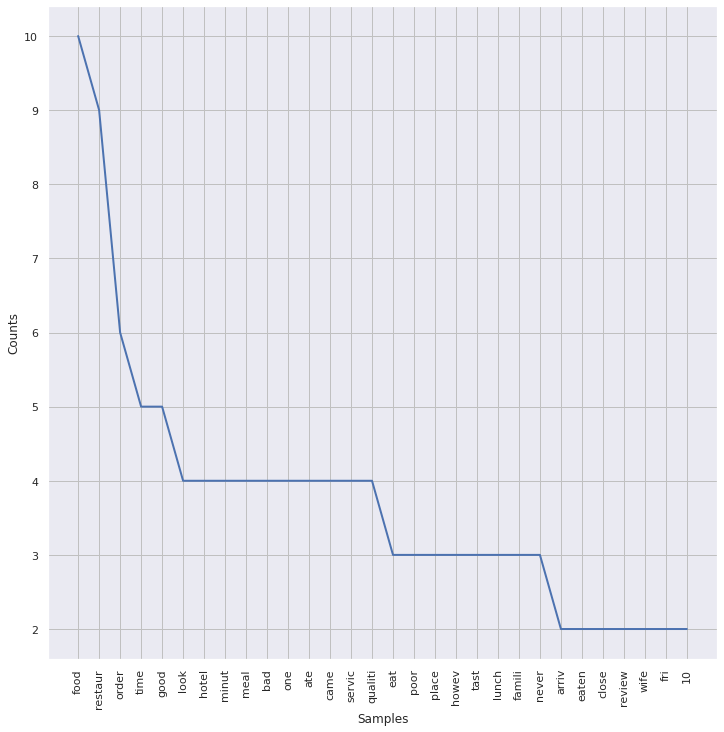

In [32]:
# Plot frequency distribution of all tokens in negative reviews

plt.figure(figsize=(12,12))
neg_freqdist.plot(30)